In [1]:
# Importing standard data manipulation libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
import pickle

In [2]:
# Importing ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_error,confusion_matrix, accuracy_score,roc_curve,roc_auc_score

In [3]:
clean_df = pd.read_csv('heart.csv')
clean_df.head()
clean_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
clean_df['High_chol_age'] = ((clean_df['chol']>=240) & (clean_df['age']>=55)).astype(int)
clean_df['High_trestbps_thalach'] = ((clean_df['trestbps']>=130) & (clean_df['thalach']>=153)).astype(int)
clean_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,High_chol_age,High_trestbps_thalach
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0


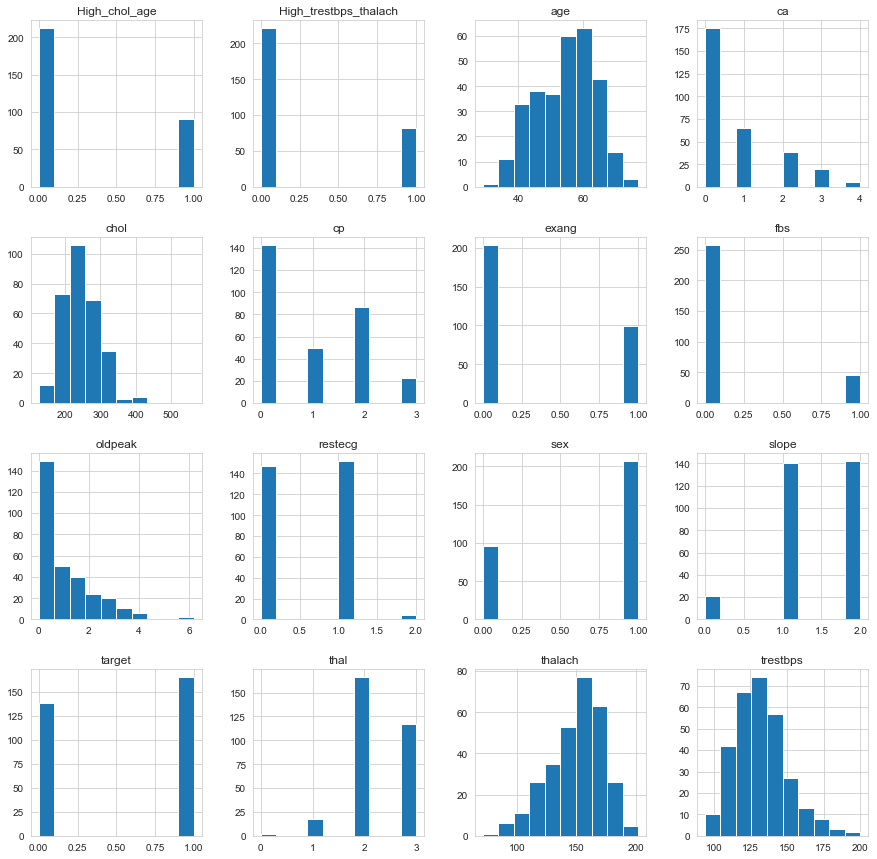

In [5]:
clean_df.hist(bins=10,figsize=(15,15))
plt.show()

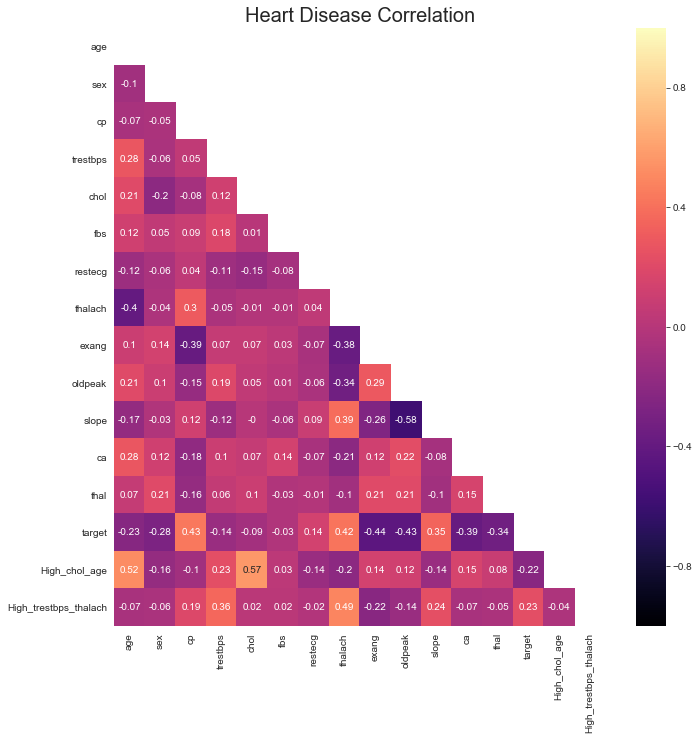

In [6]:
corr = clean_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.figure(figsize=(11,11))
sns.heatmap(np.round(corr,2),vmin=-1,vmax=1,annot=True,cmap='magma',mask=mask)
plt.title('Heart Disease Correlation',fontsize=20)
plt.show()

In [8]:
X = clean_df.drop(['target'],axis=1)
y = clean_df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

In [9]:
sc = StandardScaler()
x = np.array(clean_df['age']).reshape(-1,1)
y = np.array(clean_df['chol'])
sc.fit(X,y)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
pipelines = {
             'dt': make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=123)),
             'rf': make_pipeline(StandardScaler(),RandomForestClassifier(random_state=123)),
             'gb': make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=123)),
             'ada': make_pipeline(StandardScaler(),AdaBoostClassifier(random_state=123)),
            }


In [30]:
# pipelines['svc'].get_params()

In [12]:
dt_hyperparametes = {
    'decisiontreeclassifier__max_depth' : [1,2,3,4,5],
    'decisiontreeclassifier__min_samples_leaf' : [1,2,3,4,5]
}
    
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [1,2,3,4],
    'randomforestclassifier__max_features' : ['auto','sqrt',0.33]
}
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100,200,300],
    'gradientboostingclassifier__learning_rate' : [0.05,0.1,0.2],
    'gradientboostingclassifier__max_depth': [1,2,3]
}
ada_hyperparameters = {
    'adaboostclassifier__n_estimators' : [50,75,100],
    'adaboostclassifier__learning_rate' : [0.05,0.1,0.2]
}

# Create hyperparameters dictionary
hyperparameters = {
    'dt' : dt_hyperparametes,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'ada' : ada_hyperparameters,
}

In [13]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

dt has been fitted.
rf has been fitted.
gb has been fitted.
ada has been fitted.


In [14]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict_proba(X_test)
        pred = [p[1] for p in pred]
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

dt has been fitted.
rf has been fitted.
gb has been fitted.
ada has been fitted.


In [46]:
# fitted_models['dt'].best_estimator_

In [15]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

dt 0.8099173553719008
rf 0.78099173553719
gb 0.8388429752066116
ada 0.8388429752066116


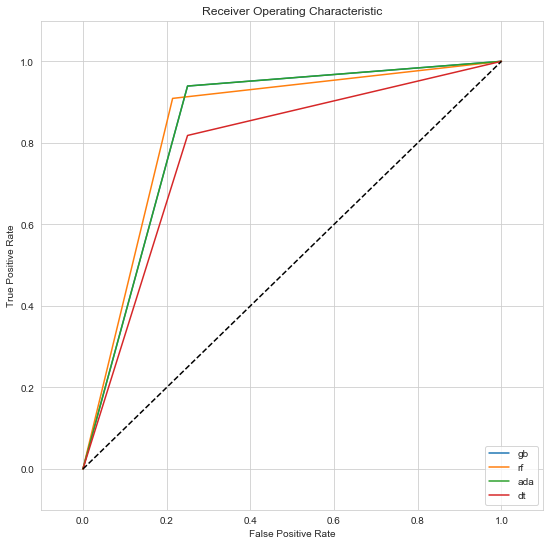

In [16]:
gbr = GradientBoostingClassifier(learning_rate=0.05,loss='deviance',max_depth=1,random_state=123)
gbr.fit(X_train,y_train)
rfr = RandomForestClassifier(n_estimators=5,n_jobs=1,random_state=123)
rfr.fit(X_train,y_train)
adad = AdaBoostClassifier(learning_rate=0.05,n_estimators=50,random_state=123)
adad.fit(X_train,y_train)
dtt = DecisionTreeClassifier(min_samples_leaf=1,min_samples_split=2,random_state=123)
dtt.fit(X_train,y_train)


# Initialize figure
fig = plt.figure(figsize=(9,9))
plt.title('Receiver Operating Characteristic')

fpr, tpr, thresholds = roc_curve(y_test,gbr.predict(X_test))
# Plot ROC curve
plt.plot(fpr, tpr, label='gb')

fpr, tpr, thresholds = roc_curve(y_test,rfr.predict(X_test))
# Plot ROC curve
plt.plot(fpr, tpr, label='rf')

fpr, tpr, thresholds = roc_curve(y_test,adad.predict(X_test))
# Plot ROC curve
plt.plot(fpr, tpr, label='ada')

fpr, tpr, thresholds = roc_curve(y_test,dtt.predict(X_test))
# Plot ROC curve
plt.plot(fpr, tpr, label='dt')

plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
# zipped = dict(zip(pred,y_test))
# for k,v in zipped.items():
#     print(k,v)

In [17]:
roc_auc_score(y_test,adad.predict(X_test))

0.8446969696969697

In [20]:
confusion_matrix(y_test,adad.predict(X_test))

array([[21,  7],
       [ 2, 31]], dtype=int64)